<h1 style="text-align: center;">Analisis Segmen Pelanggan dan Pola Pembelian<br>untuk Optimasi Pemasaran di Supermarket</h1>
<h3 style="text-align: center;">Jawed Iqbal Alfaruqiy</h3>

---

# Latar Belakang
Supermarket memiliki data pelanggan yang mencakup demografi, pola pembelian, dan respons kampanye pemasaran. Memahami perilaku pelanggan penting untuk meningkatkan strategi pemasaran dan penjualan. Dengan analisis data, supermarket dapat mengoptimalkan pemasaran, meningkatkan retensi pelanggan, dan mengelola stok lebih efisien melalui segmentasi pelanggan dan promosi yang dipersonalisasi.

## Pernyataan Masalah

Supermarket ingin mengetahui **segmen pelanggan bernilai tinggi dan pola pembelian mereka** agar dapat meningkatkan efektivitas pemasaran, mengurangi biaya promosi yang tidak efisien, dan mengoptimalkan pengelolaan stok

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik pelanggan yang memberikan kontribusi terbesar terhadap pendapatan supermarket, terutama dibandingkan pelanggan dengan pengeluaran lebih rendah?**

## Key Objective

Key Objective:

Untuk mengatasi permasalahan tersebut, beberapa tujuan utama dari analisis data ini adalah:

1. **Mengidentifikasi** segmen pelanggan berdasarkan data demografi dan pola pembelian guna meningkatkan personalisasi pemasaran.

1. **Menganalisis** efektivitas kampanye pemasaran dengan mengevaluasi tingkat respons pelanggan terhadap berbagai promosi.

1. **Mengungkap** pola pembelian pelanggan untuk membantu pengambilan keputusan dalam penawaran produk dan strategi harga.

1. **Memprediksi** loyalitas pelanggan dan mengembangkan strategi untuk meningkatkan keterlibatan serta retensi pelanggan.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [Disini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK)

In [1084]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

Supermarket Customers Data Dicitonary:  
- Customer
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years
- Promotion
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
- Place
    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalog
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to the company’s website in the last month

Berikut 5 baris teratas dan terbawah dari dataset supermarket customers:

In [1085]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset supermarket customers.

In [1086]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [1087]:
display(df.describe().round(3), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240.000,2216.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,...,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.0,2240.0,2240.000
mean,5592.160,1968.806,52247.251,0.444,0.506,49.109,303.936,26.302,166.950,37.525,...,5.317,0.073,0.075,0.073,0.064,0.013,0.009,3.0,11.0,0.149
std,3246.662,11.984,25173.077,0.538,0.545,28.962,336.597,39.773,225.715,54.629,...,2.427,0.260,0.263,0.260,0.245,0.115,0.096,0.0,0.0,0.356
min,0.000,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
25%,2828.250,1959.000,35303.000,0.000,0.000,24.000,23.750,1.000,16.000,3.000,...,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
50%,5458.500,1970.000,51381.500,0.000,0.000,49.000,173.500,8.000,67.000,12.000,...,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
75%,8427.750,1977.000,68522.000,1.000,1.000,74.000,504.250,33.000,232.000,50.000,...,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.0,11.0,0.000
max,11191.000,1996.000,666666.000,2.000,2.000,99.000,1493.000,199.000,1725.000,259.000,...,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.0,11.0,1.000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [1088]:
# Gunakan None atau angka positif untuk max_colwidth
pd.set_option('display.max_colwidth', 1000)  # atau gunakan angka besar seperti 1000

# data unik di tiap kolom
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                         data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014,..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 25, 258, 565, 2, 721, 1032, 577, 64, 163, 17, 130, 292, 350, 135, 230, 7, 445, 15, 27, 505, 51, 207, 41, 386, 562, 217, 144, 454, 425, 133

Secara umum, kita bisa melihat bahwa:
* dataset supermarket_customer memiliki 2240 baris dan 29 kolom
* Pada `Marital_Status`: pada data `Single` atau `Alone` menunjukkan adanya nilai pada `Kidhome` atau `Teenhome` yang menunjukkan *household* tersebut memiliki anak. Tidak berarti itu adalah anak dari orang tersebut, besar kemungkinan adik atau kakak.
* `2n Cycle` Memiliki arti yang sama dengan `Graduation`
* Pada website [Europian union](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Marital_status#:~:text=There%20are%20several%20types%20of,in%20certain%20cases%2C%20registered%20partnership.) menunjukkan bahwa pada kolom `Marital_Status`: Status pernikahan pelanggan. Beberapa nilai seperti YOLO dan Absurd tidak relevan dan akan dikategorikan sebagai NaN. Beberapa kategori seperti Together bisa digabungkan dengan Married, dan Alone dengan Single.
* Beberapa kolom seperti `Income`, `Recency`, `Year_Birth`. Perlu dicek kembali agar tidak ada *outlier*
* Pada kolom `Income`, ada *missing value*.
* Adapun beberapa kolom yang dapat diabaikan seperti `Dt_Customer`, `Z_CostContact`, `Z_Revenue`, `ID` karena tidak memiliki pengaruh terhadap analisis ini.
* Pada kolom `Education` akan digabungkan dengan Master karena 2n Cycle memiliki nilai yang sama dengan Master.
* Pada `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Jumlah uang yang dihabiskan pelanggan untuk kategori produk tertentu dalam dua tahun terakhir. Perlu dicek apakah ada nilai ekstrem atau anomali.
* `NumDealsPurchases` Bisa digunakan untuk melihat apakah pelanggan cenderung membeli hanya saat ada promo.
* `Complain` Bisa digunakan untuk melihat hubungan dengan kepuasan pelanggan.
* Diketahui bahwa terakhir pelanggan berbelanja adalah pada tanggal 2014-09-08. maka dapat diasumsikan bahwa data terakhir didapat pada tahun 2014. sehingga kita dapat menambahkan kolom baru yaitu `Year_old` untuk mengetahui umur pelanggan saat ini, dengan cara `Year_old = 2014 - Year_Birth`.

### Missing Value

In [1089]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Dikarenakan *missing value* pada kolom hanya ada pada kolom `income` dengan proporsi yang sangat kecil (<2%), kita bisa menghapus baris yang mengandung *missing value* tersebut.

In [1090]:
# Menghapus Missing value
df.dropna(inplace=True)

In [1091]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Setelah semua jumlah data disamakan maka dapat dilakukan eksplorasi data lebih lanjut.


### Mengecek Duplikasi Data

In [1092]:
# Mengecek duplikasi berdasarkan subset kolom (misalnya tanpa mempertimbangkan ID)
df.duplicated(subset=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer']).sum()

np.int64(201)

In [1093]:
df.drop_duplicates(subset=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer'], inplace=True)

### Memperbaiki kolom
Pertama, Pada kolom `Marital_Status` kita harus menangani nilai yang tidak valid dengan cara mengubah data 'Alone' menjadi 'Single' dan 'Together' menjadi 'Married'.

Kemudian untuk `YOLO` dan `Absurd` ada 3 opsi, yakni:
1. Menghapus baris yang mengandung data ini
2. Mengganti nilai ini dengan `unknown`
3. Memasukkan kedalam **Kategori yang ada**

In [1094]:
df['Marital_Status'].value_counts()

Marital_Status
Married     781
Together    510
Single      436
Divorced    213
Widow        69
Alone         3
Absurd        2
YOLO          1
Name: count, dtype: int64

Melihat isi kolom yang memiliki nilai 'YOLO' dan 'Absurd' sebelum diganti:

In [1095]:
display(df[df['Marital_Status'] == 'YOLO'])
display(df[df['Marital_Status'] == 'Absurd'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,2,0,0,0,0,0,0,3,11,0


* Dari hasil kolom `YOLO` bahwa dari 1 data yang ada, itu menunjukkan masih memiliki **1 anggota keluarga** bersamanya dan pada artinya `YOLO` adalah *You Only Live Once* itu menunjukkan bahwa orang tersebut tidak memiliki pasangan. tetapi bisa masuk dalam kategori `Single`, `Divorced`, ataupun `Widow`.
* Sedangkan pada kolom `Absurd` bahwa dari 2 data yang ada, itu menunjukkan  **0 anggota keluarga** bersamanya dapat diartikan sebagai tidak memiliki pasangan. Yang berarti dapat dikategorikan `Single`.

Dapat disimpulkan bahwa data `YOLO` akan dihapus dikarenakan masih ambigu, sedangkan `Absurd` akan dimasukkan ke dalam kategori `Single`.

In [1096]:
# Menghapus data dengan Marital_Status "YOLO"
df = df[df['Marital_Status'] != 'YOLO']

# Menggabungkan "Alone/Absurd" dan "Together" menjadi "Single" dan "Married"
df.loc[df['Marital_Status']=='Alone', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='Absurd', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='Together', 'Marital_Status'] = 'Married'

In [1097]:
df['Marital_Status'].value_counts()

Marital_Status
Married     1291
Single       441
Divorced     213
Widow         69
Name: count, dtype: int64

Menggabungkan baris dengan nilai `2n Cycle` ke dalam baris `Graduation` karena memiliki arti yang sama.

In [1098]:
df.loc[df['Education'] == '2n Cycle', 'Education'] = 'Graduation'

 ### Memperbaiki Format Data

Mengubah `Year_Birth` menjadi `Age` agar lebih mudah digunakan.

In [1099]:
df['Age'] = 2014 - df['Year_Birth']

Menggabungkan `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, dan `MntGoldProds` menjadi `Total_Spending` untuk Mempermudah Analisis

In [1100]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

### Menghapus Kolom
Terakhir, kita akan menghapus kolom yang tidak dibutuhkan untuk analisis ini. Kolom yang akan dihapus adalah: `ID`. Kolom ini tidak memiliki informasi yang relevan untuk analisis ini.

Untuk kolom `Dt_Customer`, `Z_CostContact`, dan `Z_Revenue` juga akan kenapa dihapus adalah karena tujuan analisis ini adalah untuk mengetahui pola pembelian pelanggan. Oleh karena itu, membandingkan variabel yang tidak secara langsung berkaitan dengan kebiasaan belanja pelanggan tidak akan memberikan wawasan yang relevan.

In [1101]:
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

Mengecek kembali isi keseluruhan data:

In [1102]:
display(df.head(), df.tail())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
0,1957,Graduation,Single,58138.0,0,0,58,3,8,10,...,7,0,0,0,0,0,0,1,57,1617
1,1954,Graduation,Single,46344.0,1,1,38,2,1,1,...,5,0,0,0,0,0,0,0,60,27
2,1965,Graduation,Married,71613.0,0,0,26,1,8,2,...,4,0,0,0,0,0,0,0,49,776
3,1984,Graduation,Married,26646.0,1,0,26,2,2,0,...,6,0,0,0,0,0,0,0,30,53
4,1981,PhD,Married,58293.0,1,0,94,5,5,3,...,5,0,0,0,0,0,0,0,33,422


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
2233,1977,Graduation,Married,666666.0,1,0,23,4,3,1,...,6,0,0,0,0,0,0,0,37,62
2235,1967,Graduation,Married,61223.0,0,1,46,2,9,3,...,5,0,0,0,0,0,0,0,47,1341
2237,1981,Graduation,Divorced,56981.0,0,0,91,1,2,3,...,6,0,1,0,0,0,0,0,33,1241
2238,1956,Master,Married,69245.0,0,1,8,2,6,5,...,3,0,0,0,0,0,0,0,58,843
2239,1954,PhD,Married,52869.0,1,1,40,3,3,1,...,7,0,0,0,0,0,0,1,60,172


In [1103]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2014, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,Year_Birth,int64,0,59,"[1989, 1965]"
1,Education,object,0,4,"[Master, Graduation]"
2,Marital_Status,object,0,4,"[Married, Single]"
3,Income,float64,0,1974,"[27213.0, 46854.0]"
4,Kidhome,int64,0,3,"[0, 1]"
5,Teenhome,int64,0,3,"[1, 2]"
6,Recency,int64,0,100,"[20, 63]"
7,NumDealsPurchases,int64,0,15,"[7, 1]"
8,NumWebPurchases,int64,0,15,"[8, 0]"
9,NumCatalogPurchases,int64,0,14,"[6, 7]"


In [1104]:
df_new = pd.read_csv('cleaned_supermarket_customers.csv')
display(df_new.head(),df_new.tail())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
0,1957,Graduation,Single,58138.0,0,0,58,3,8,10,...,7,0,0,0,0,0,0,1,57,1617
1,1954,Graduation,Single,46344.0,1,1,38,2,1,1,...,5,0,0,0,0,0,0,0,60,27
2,1965,Graduation,Married,71613.0,0,0,26,1,8,2,...,4,0,0,0,0,0,0,0,49,776
3,1984,Graduation,Married,26646.0,1,0,26,2,2,0,...,6,0,0,0,0,0,0,0,30,53
4,1981,PhD,Married,58293.0,1,0,94,5,5,3,...,5,0,0,0,0,0,0,0,33,422


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
2009,1977,Graduation,Married,666666.0,1,0,23,4,3,1,...,6,0,0,0,0,0,0,0,37,62
2010,1967,Graduation,Married,61223.0,0,1,46,2,9,3,...,5,0,0,0,0,0,0,0,47,1341
2011,1981,Graduation,Divorced,56981.0,0,0,91,1,2,3,...,6,0,1,0,0,0,0,0,33,1241
2012,1956,Master,Married,69245.0,0,1,8,2,6,5,...,3,0,0,0,0,0,0,0,58,843
2013,1954,PhD,Married,52869.0,1,1,40,3,3,1,...,7,0,0,0,0,0,0,1,60,172


In [1105]:
display(df_new.describe().round(3), df_new.describe(include='object'))

,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spending
count,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000,2014.000
mean,1968.782,52363.968,0.442,0.506,49.013,2.326,4.098,2.669,5.784,5.312,0.073,0.075,0.072,0.066,0.013,0.010,0.150,45.218,607.367
std,11.987,25586.878,0.536,0.547,28.948,1.924,2.759,2.941,3.237,2.437,0.261,0.264,0.259,0.248,0.113,0.099,0.357,11.987,602.942
min,1893.000,1730.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.000,5.000
25%,1959.000,35528.250,0.000,0.000,24.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,37.000,69.000
50%,1970.000,51550.000,0.000,0.000,49.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,44.000,396.000
75%,1977.000,68648.000,1.000,1.000,74.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,55.000,1047.750
max,1996.000,666666.000,2.000,2.000,99.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,121.000,2525.000


,Education,Marital_Status
count,2014,2014
unique,4,4
top,Graduation,Married
freq,1197,1291


# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Bagaimana karakteristik pelanggan yang memberikan kontribusi terbesar terhadap pendapatan supermarket, terutama dibandingkan pelanggan dengan pengeluaran lebih rendah?**.

Analisis akan dilakukan dengan membandingkan pelanggan berdasarkan pola pembelian dan karakteristiknya. Tujuan utama adalah memahami faktor-faktor yang memengaruhi perilaku belanja pelanggan.

Dari **2216 data pelanggan**, kita akan melihat perbedaan perilaku berdasarkan berbagai fitur seperti **umur, status pernikahan, tingkat pendidikan, pendapatan, serta kebiasaan belanja**.

Karena data ini memiliki berbagai fitur numerik dan kategorikal, maka:

* **Untuk data kategorikal**, perbandingan akan dilakukan berdasarkan **proporsi (%)**, bukan hanya jumlah absolut, agar lebih akurat dalam memahami distribusi.
* **Untuk data numerik**, analisis dilakukan dengan melihat **rata-rata, median, serta distribusi (skewness & outliers)** guna memahami kecenderungan dan variasi antar pelanggan.
Selain itu, kita juga akan melihat **pola pembelian dan efektivitas kampanye pemasaran**, untuk mengetahui apakah ada perbedaan signifikan antara pelanggan yang menerima promo dengan yang tidak.

## 1. Berdasarkan Usia: `Age`

Mari kita eksplorasi berdasarkan usia `Age` melalui beberapa pertanyaan berikut:

* Bagaimana distribusi pelanggan berdasarkan usia mereka?
* Kelompok usia mana yang memiliki pengeluaran tertinggi?
* Apakah terdapat hubungan antara usia dan total pengeluaran pelanggan?

In [1116]:
# Buat kelompok usia
bins = [18, 30, 45, 60, 80, 130]
labels = ['18-30', '31-45', '46-60', '61-80', '81+']
df_new['Age_Group'] = pd.cut(df_new['Age'], bins=bins, labels=labels, right=False)

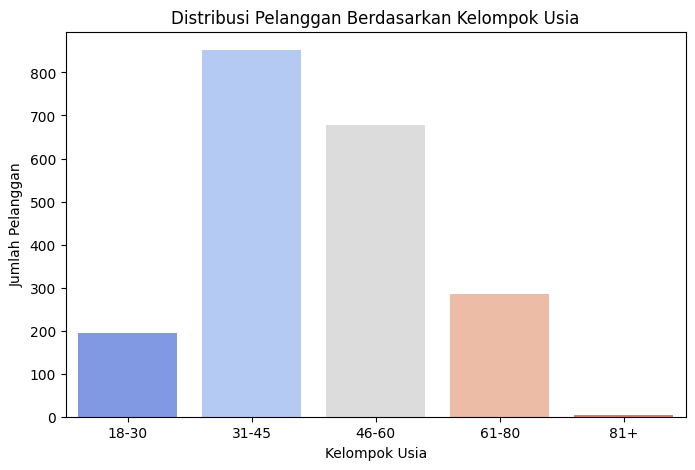

In [1117]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_new, x='Age_Group', palette='coolwarm', order=['18-30','31-45','46-60','61-80','81+'])
plt.title("Distribusi Pelanggan Berdasarkan Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pelanggan")
plt.show()

Kelompok usia paling dominan adalah 31–45 tahun (852 orang), disusul oleh 46–60 tahun (679 orang). Sementara itu, kelompok usia ekstrem seperti 81+ sangat kecil hanya 3 orang. Sebagian besar pelanggan supermarket berada dalam usia produktif, yaitu 31–60 tahun. Ini adalah kelompok yang paling penting dalam strategi pemasaran.

In [1118]:
age_group_stats = df_new.groupby('Age_Group')['Total_Spending'].agg(['count', 'mean', 'median', 'min', 'max'])
age_group_stats

,count,mean,median,min,max
Age_Group,,,,,
18-30,195,590.005128,169.0,10,2525
31-45,852,526.534038,240.5,5,2349
46-60,679,655.671576,528.0,6,2486
61-80,285,745.400000,637.0,8,2440
81+,3,646.666667,65.0,22,1853


Meskipun jumlah pelanggan terbanyak berada pada usia 31–45 tahun, pelanggan usia 61–80 tahun memiliki rata-rata dan median pengeluaran tertinggi. Artinya, pelanggan lansia cenderung lebih royal dalam berbelanja.

Hal ini bisa terjadi karena:
- Kelompok usia lanjut memiliki penghasilan pensiun stabil
- Berbelanja lebih banyak untuk rumah tangga atau keluarga
- Memiliki kebutuhan kesehatan atau hobi tertentu yang lebih mahal

Namun, kelompok 81+ terlihat memiliki rata-rata tinggi (646) tapi median sangat rendah (65), mengindikasikan outlier. Jadi, hasil kelompok ini tidak bisa dijadikan acuan valid karena jumlah datanya sangat sedikit (3 orang saja).

In [1119]:
# Korelasi
correlation_age = df_new[['Age', 'Total_Spending']].corr().iloc[0, 1]
print(f"Korelasi antara usia dan total pengeluaran: {correlation_age:.2f}")

Korelasi antara usia dan total pengeluaran: 0.12


Korelasi antara Age dan Total_Spending adalah +0.12, artinya ada hubungan positif lemah antara usia dan pengeluaran. Semakin tua usia pelanggan, cenderung ada sedikit peningkatan pengeluaran, namun hubungan ini tidak terlalu kuat. Korelasi yang lemah bisa jadi karena:
- Kelompok usia muda memiliki variasi tinggi (banyak belanja kecil & besar)
- Kelompok lansia lebih stabil namun populasinya lebih sedikit

Menariknya, walaupun kelompok usia 31–45 tahun paling dominan secara jumlah, kelompok usia 61–80 tahun justru paling konsumtif. Korelasi yang positif (meskipun lemah) mendukung bahwa semakin bertambah usia, pelanggan memiliki kecenderungan untuk berbelanja lebih besar.

Ini mungkin dipengaruhi oleh faktor seperti kestabilan finansial (pensiun), waktu luang yang lebih banyak, atau fokus pada kualitas hidup. Namun perlu diingat bahwa kelompok 81+ tidak dapat menjadi acuan karena sangat kecil secara statistik.

### 2. Berdasarkan Pendapatan Pelanggan: `Income`

* Bagaimana distribusi pendapatan pelanggan?
* Apakah ada hubungan antara pendapatan dan total pengeluaran?
* Pendapatan berapa yang paling banyak menghabiskan uang?
* Apakah pengeluaran meningkat secara proporsional dengan pendapatan?

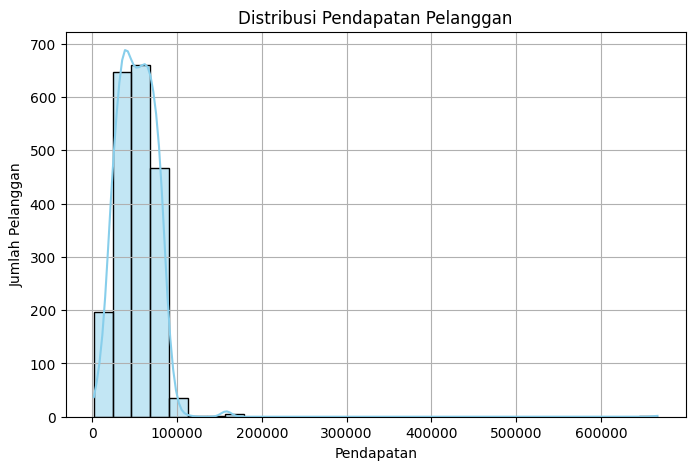

In [1125]:
plt.figure(figsize=(8, 5))
sns.histplot(df_new['Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()


Distribusi pendapatan pelanggan menunjukkan mayoritas pelanggan memiliki pendapatan di kisaran 25.000 hingga 75.000, dengan sedikit pelanggan di atas 100.000. Data menunjukkan sedikit skew ke kanan, artinya terdapat kelompok kecil pelanggan dengan pendapatan sangat tinggi.

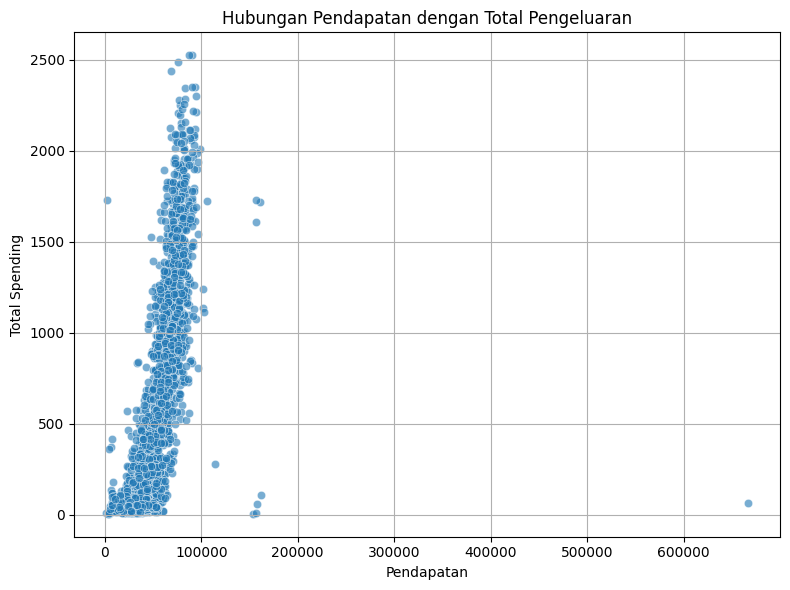

Korelasi antara pendapatan dan total pengeluaran: 0.65


In [1145]:
# Scatter plot & korelasi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Spending', data=df_new, alpha=0.6)
plt.title("Hubungan Pendapatan dengan Total Pengeluaran")
plt.xlabel("Pendapatan")
plt.ylabel("Total Spending")
plt.grid(True)
plt.tight_layout()
plt.show()

# Korelasi
correlation_income = df_new[['Income', 'Total_Spending']].corr().iloc[0, 1]
print(f"Korelasi antara pendapatan dan total pengeluaran: {correlation_income:.2f}")


Korelasi antara `Income` dan `Total_Spending` adalah 0.65, yang berarti terdapat hubungan positif cukup kuat antara pendapatan dan total pengeluaran pelanggan. Pelanggan dengan pendapatan yang lebih tinggi cenderung membelanjakan lebih banyak. Ini menjadikan pendapatan sebagai faktor penting dalam strategi targeting dan segmentasi.

Sebelumnya kita menemukan bahwa kelompok usia 61–80 memiliki rata-rata pengeluaran tertinggi. Temuan pada pendapatan ini menunjukkan bahwa mungkin mereka berasal dari kelompok berpenghasilan menengah ke atas, sehingga mendukung tingginya pengeluaran di usia tersebut.

In [1146]:
# Membuat income group (dengan binning)
df_new['Income_Group'] = pd.cut(df_new['Income'],
                                bins=[0, 25000, 50000, 75000, 100000, 150000],
                                labels=['<25K', '25K-50K', '50K-75K', '75K-100K', '100K+'])

income_stats = df_new.groupby('Income_Group')['Total_Spending'].agg(['count', 'mean', 'median'])
display(income_stats)


,count,mean,median
Income_Group,,,
<25K,219,73.520548,50.0
25K-50K,738,170.817073,80.0
50K-75K,729,842.488340,817.0
75K-100K,315,1447.984127,1428.0
100K+,5,1097.600000,1135.0


Kelompok 75K–100K memiliki rata-rata dan median pengeluaran tertinggi. Menariknya, kelompok 100K+ justru memiliki pengeluaran yang lebih rendah meskipun secara nominal tetap tinggi. Kelompok 75K–100K adalah segmen paling konsumtif dan stabil, baik dari sisi jumlah maupun pengeluaran. Sedangkan 100K+ meskipun memiliki potensi besar, ukurannya terlalu kecil (hanya 5 orang) untuk dijadikan target utama tanpa analisis lebih lanjut.

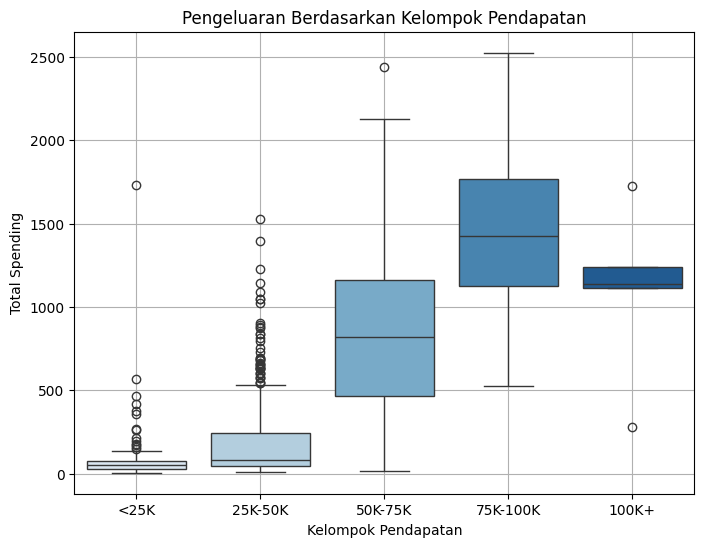

In [1151]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income_Group', y='Total_Spending', data=df_new, palette='Blues')
plt.title('Pengeluaran Berdasarkan Kelompok Pendapatan')
plt.xlabel('Kelompok Pendapatan')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()


Terlihat tren peningkatan pengeluaran yang jelas dan proporsional dari kelompok <25K hingga 75K–100K. Namun, variabilitas tinggi pada beberapa grup menunjukkan bahwa tidak semua pelanggan berpendapatan tinggi memiliki pengeluaran tinggi.

Catatan Tambahan:

Faktor lain seperti usia, status pernikahan, atau gaya hidup bisa memengaruhi kecenderungan belanja ini. Maka strategi yang hanya berdasarkan income saja bisa kurang optimal.

Setelah sebelumnya ditemukan bahwa usia hanya berpengaruh kecil terhadap pengeluaran, analisis pendapatan ini menunjukkan bahwa income merupakan prediktor yang jauh lebih signifikan terhadap perilaku belanja.

Korelasi sebesar +0.65 mengindikasikan bahwa pengeluaran pelanggan sangat dipengaruhi oleh pendapatan. Kelompok 75K–100K muncul sebagai segmen paling bernilai, sementara kelompok <50K bisa diposisikan sebagai segmen yang perlu edukasi produk atau penawaran spesial.

### 3. Berdasarkan Tingkat Pendidikan Pelanggan: `Education`

Menganalisis apakah tingkat pendidikan pelanggan berpengaruh terhadap pola pengeluaran dan karakteristik lainnya.

* Bagaimana distribusi jumlah pelanggan berdasarkan tingkat pendidikan?
* Apakah terdapat perbedaan signifikan pada pengeluaran berdasarkan tingkat pendidikan?
* Tingkat pendidikan mana yang memiliki pengeluaran rata-rata tertinggi?
* Adakah hubungan antara tingkat pendidikan dan respons terhadap kampanye pemasaran?

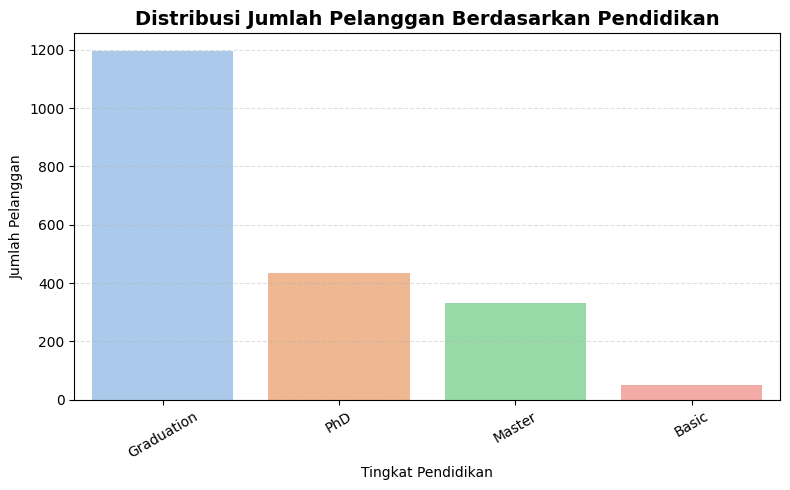

In [1152]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_new, x='Education', palette='pastel')
plt.title('Distribusi Jumlah Pelanggan Berdasarkan Pendidikan', fontsize=14, fontweight='bold')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Sebagian besar pelanggan berasal dari latar belakang pendidikan Graduation dan PhD. Hal ini menunjukkan bahwa mayoritas pelanggan adalah individu dengan latar belakang pendidikan tinggi, yang berpotensi memiliki daya beli lebih besar.

In [1153]:
education_spending = df_new.groupby('Education')['Total_Spending'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)
education_spending

,count,mean,median
Education,,,
PhD,436,672.802752,494.0
Master,332,610.987952,391.5
Graduation,1197,603.956558,384.0
Basic,49,83.918367,57.0


Pelanggan dengan pendidikan PhD dan Master cenderung mengeluarkan pengeluaran yang lebih besar dibandingkan dengan mereka yang berpendidikan Basic. Ini sejalan dengan kemungkinan korelasi tidak langsung antara tingkat pendidikan dan pendapatan.

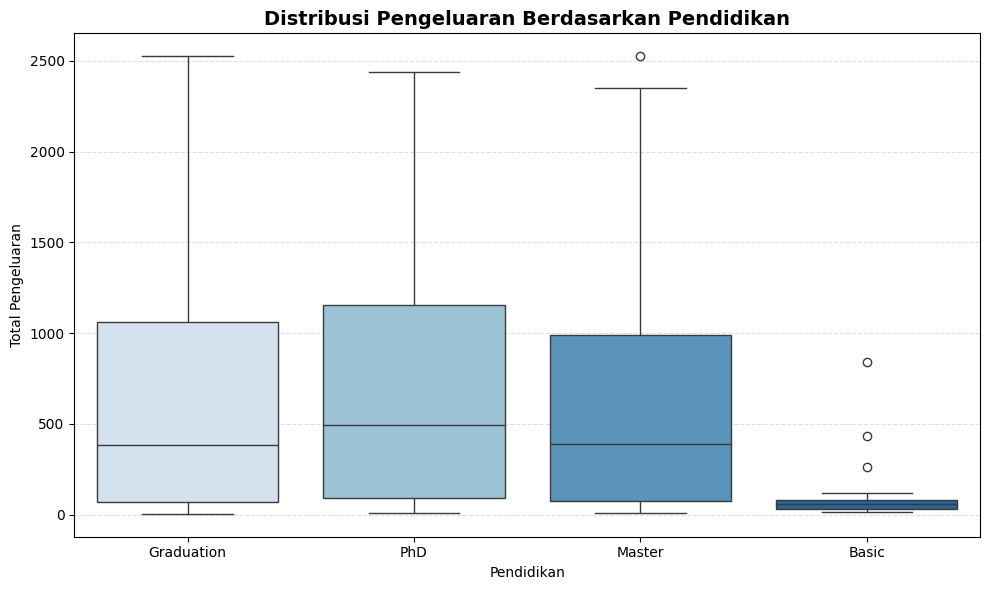

In [1154]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='Education', y='Total_Spending', palette='Blues')
plt.title('Distribusi Pengeluaran Berdasarkan Pendidikan', fontsize=14, fontweight='bold')
plt.xlabel('Pendidikan')
plt.ylabel('Total Pengeluaran')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

* Pendidikan PhD dan Master memiliki median dan kuartil atas pengeluaran yang tinggi.
* Pendidikan Basic menunjukkan pengeluaran yang cenderung sangat rendah.
* Variasi pengeluaran terbesar terdapat pada kelompok 2n Cycle, menunjukkan ketidakmerataan daya beli pada kelompok ini.

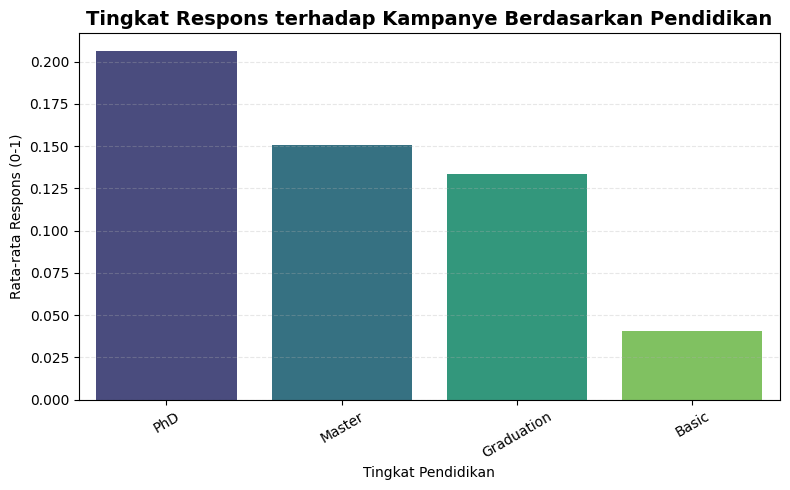

In [ ]:
edu_response = df_new.groupby('Education')['Response'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=edu_response.index, y=edu_response.values, palette='viridis')
plt.title('Tingkat Respons terhadap Kampanye Berdasarkan Pendidikan', fontsize=14, fontweight='bold')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Rata-rata Respons (0-1)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

* Pelanggan dengan PhD dan Master menunjukkan tingkat respons kampanye tertinggi.
* Sebaliknya, pelanggan dengan pendidikan Basic hampir tidak merespons kampanye, menandakan keterlibatan yang rendah.
* Ini bisa menunjukkan bahwa pendidikan lebih tinggi berkorelasi dengan tingkat keterlibatan terhadap aktivitas pemasaran.

Insight ini konsisten dengan kategori `Income`, di mana pendapatan yang lebih tinggi sama dengan pengeluaran lebih besar dan umumnya berasal dari latar belakang pendidikan lebih tinggi.
Hal ini memperkuat asumsi bahwa pendidikan merupakan faktor tidak langsung yang memengaruhi total spending melalui jalur pendapatan.

### 4. Berdasarkan Status Pernikahan Pelanggan: `Marital_Status`

Mengevaluasi pengaruh status pernikahan terhadap perilaku belanja dan keterlibatan dalam kampanye pemasaran.

* Bagaimana distribusi jumlah pelanggan berdasarkan status pernikahan?
* Apakah status pernikahan memengaruhi total pengeluaran pelanggan?
* Status pernikahan mana yang paling responsif terhadap kampanye pemasaran?
* Apakah terdapat perbedaan spending antar status pernikahan yang signifikan?

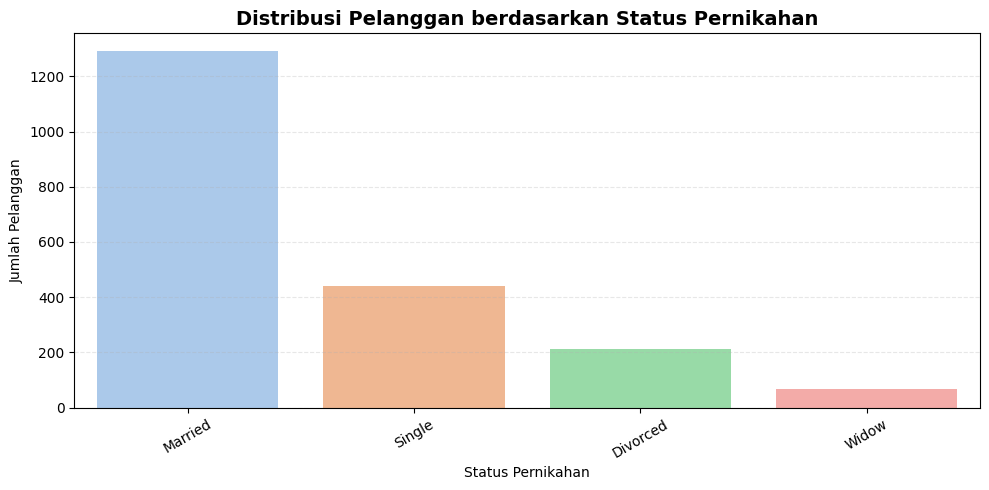

In [1156]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_new, x='Marital_Status', palette='pastel', order=df_new['Marital_Status'].value_counts().index)
plt.title('Distribusi Pelanggan berdasarkan Status Pernikahan', fontsize=14, fontweight='bold')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Mayoritas pelanggan memiliki status Married dan Together, menandakan bahwa pelanggan dengan pasangan (baik menikah atau tinggal bersama) adalah demografi dominan dalam data ini.

In [1158]:
marital_spending = df_new.groupby('Marital_Status')['Total_Spending'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)
marital_spending

,count,mean,median
Marital_Status,,,
Widow,69,743.797101,636.0
Divorced,213,608.093897,384.0
Single,441,608.052154,369.0
Married,1291,599.721921,397.0


Pelanggan dengan status Together dan Married memiliki rata-rata pengeluaran tertinggi, sementara Divorced dan Widow/YOLO berada di posisi bawah.
Hal ini dapat dihubungkan dengan faktor stabilitas ekonomi: pelanggan yang memiliki pasangan cenderung memiliki pendapatan rumah tangga yang lebih besar atau kebutuhan konsumsi lebih tinggi.